# Cement Manufacturing Dataset
## by HAMZAT ABDULRAHMAN

## Table of Contents


#### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sb

%matplotlib inline

### Data Gathering

In [2]:
concrete = pd.read_csv("concrete.csv")
concrete.head(5)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


### Assessing

In [3]:
concrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [4]:
concrete.duplicated().sum()

25

In [5]:
concrete.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [6]:
concrete.isna().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [8]:
concrete.sample(5)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
354,135.7,203.5,0.0,185.7,0.0,1076.2,759.3,7,7.51
656,295.7,0.0,95.6,171.5,8.9,955.1,859.2,28,39.94
345,289.0,134.0,0.0,195.0,6.0,924.0,760.0,28,46.24
687,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,100,48.15
876,158.4,0.0,194.9,219.7,11.0,897.7,712.9,28,8.54


In [17]:
0.0 in concrete['slag'].values

True

### Quality Issues:
1. There are 25 duplicate rows.
2. "0.0" values instead of null.

### Data Cleaning

In [9]:
concrete_clean = concrete.copy()

#### There are 25 duplicate rows.

#### Define: 
Remove the duplicate rows using the `drop_duplicates()` function.

#### Code:

In [10]:
concrete_clean = concrete_clean.drop_duplicates()

#### Test

In [11]:
concrete_clean.duplicated().sum()

0

#### "0.0" values instead of null.

#### Define:


#### Code:

In [19]:
concrete_clean = concrete_clean.replace(0.0,np.nan)
concrete_clean = concrete_clean.dropna()

#### Test:

In [24]:
0.0 in concrete_clean['slag'].values

False

In [23]:
concrete_clean.shape

(225, 9)

## Exploratory Analysis

#### Question:
How does the distribution of "strength" of concrete looks?

#### Visualization

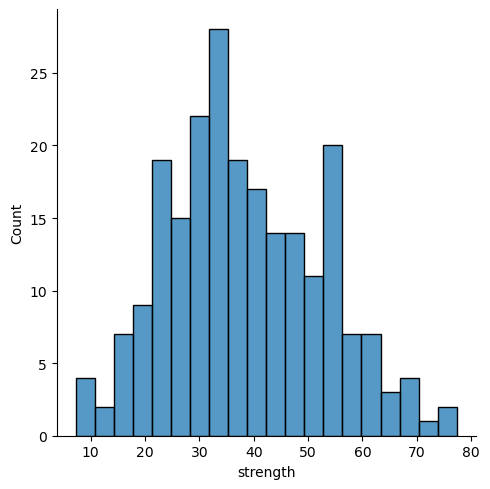

In [31]:
bin_edges = np.arange(concrete_clean['strength'].min(),concrete_clean['strength'].max() + 3.5, 3.5)
sb.displot(concrete_clean['strength'], bins = bin_edges);

#### Observation:
An approximately normal distribution having 3-4 unusual spikes of strength values less than 40Mpa